### Import Libraries

In [3]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

### Defining batch size, classes and epochs

In [4]:
batch_size = 128
num_classes = 10
epochs = 20

### The data, split between train and test sets

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

11490434/11490434 [==============================] - 0s 0us/step


### Print the shape of the data

In [6]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Convert class vectors to binary class matrices

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the model

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Fit the model

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20
469/469 [==============================] - 15s 30ms/step - loss: 0.2548 - accuracy: 0.9223 - val_loss: 0.1054 - val_accuracy: 0.9680
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1050 - accuracy: 0.9669 - val_loss: 0.0814 - val_accuracy: 0.9724
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.0630 - val_accuracy: 0.9810
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0588 - accuracy: 0.9819 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0656 - val_accuracy: 0.9809
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0651 - val_accuracy: 0.982

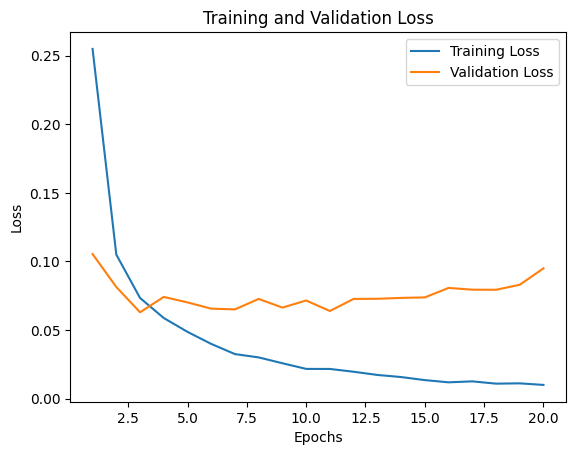

In [11]:
import matplotlib.pyplot as plt

# Access the loss values from the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_loss) + 1)

# Create the plot
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])